## <font color=Pink>Classification </font>
 
#### Considérons la base Adul (a1a), où l’objectif est de prédire si un ménage a un revenu supérieur à 50000$ ou pas.
***

###  Importer les librairies nécessaires

In [1]:
# Le package du traitement et de l'analyse de donnees: PANDAS
import pandas as pd
# Le package de la visualisation graphique: MATPLOTLIB 
import matplotlib.pyplot as plt
# Le package qui est construit sur le dessus de la bib matplotlib et il est pour la visualisation graphique statistique des donnees
import seaborn as sns
# Le package de la manipulation des tableaus et des variables aleatoires: NUMPY
import numpy as np

# Importer la fonction minmax_scale de sklearn pour mettre à l'échelle les valeurs d'une série ou d'une matrice dans un intervalle spécifié.
from sklearn.preprocessing import minmax_scale, StandardScaler 
# Importation des outils de validation croisée, de division des données et d'évaluation croisée.
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
# Importation du module de prétraitement des données.
from sklearn import preprocessing 
# Importation du module SVM pour la classification et la régression.
from sklearn import svm
# Importation de la classe SVC pour la classification SVM.
from sklearn.svm import SVC
# Importation de la classe RandomForestClassifier pour les forêts aléatoires.
from sklearn.ensemble import RandomForestClassifier
# Importation de la classe DecisionTreeClassifier pour les arbres de décision.
from sklearn.tree import DecisionTreeClassifier
#Importation de diverses métriques d'évaluation de la performance des modèles.
from sklearn.metrics import  precision_score, recall_score, f1_score, roc_auc_score, make_scorer, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error,roc_curve, r2_score

# Ignorer les alertes
import warnings
warnings.filterwarnings('ignore')

### Préparation des données

In [2]:
# Lire notre dataset du "train"
with open('C:/Users/mon/Desktop/Inbox/Studies/Apprentissage statistique/a1a.libsvm') as file_object:
    data = file_object.read()

In [3]:
rows = data.split('\n') # Fractionner les données par le caractères de saut de ligne (\n)
columns = [row.split(' ') for row in rows] # Fractionner chaque ligne par colonnes
values = [[(col) for col in row] for row in columns] # Affecter les colonnes a la variable 'values'

In [4]:
df = pd.DataFrame(values, columns=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P']) # creer un dataframe avec des noms des colonnes
print(df.head(10)) # Afficher 10 lignes du dataframe

    A    B     C     D     E     F     G     H     I     J     K     L     M  \
0  -1  3:1  11:1  14:1  19:1  39:1  42:1  55:1  64:1  67:1  73:1  75:1  76:1   
1  -1  3:1   6:1  17:1  27:1  35:1  40:1  57:1  63:1  69:1  73:1  74:1  76:1   
2  -1  4:1   6:1  15:1  21:1  35:1  40:1  57:1  63:1  67:1  73:1  74:1  77:1   
3  -1  5:1   6:1  15:1  22:1  36:1  41:1  47:1  66:1  67:1  72:1  74:1  76:1   
4  -1  2:1   6:1  16:1  22:1  36:1  40:1  54:1  63:1  67:1  73:1  75:1  76:1   
5  -1  2:1   6:1  14:1  20:1  37:1  41:1  47:1  64:1  67:1  73:1  74:1  76:1   
6  -1  1:1   6:1  14:1  22:1  36:1  42:1  49:1  64:1  67:1  72:1  74:1  77:1   
7  -1  1:1   6:1  17:1  19:1  39:1  42:1  53:1  64:1  67:1  73:1  74:1  76:1   
8  -1  2:1   6:1  18:1  20:1  37:1  42:1  48:1  64:1  71:1  73:1  74:1  76:1   
9  +1  5:1  11:1  15:1  32:1  39:1  40:1  52:1  63:1  67:1  73:1  74:1  76:1   

      N      O P  
0  80:1   83:1    
1  81:1  103:1    
2  80:1   83:1    
3  80:1   83:1    
4  80:1   83:1    
5  82

* **Voir la taille de notre ensemble de données** 

In [5]:
df_shape = df.shape
print(df_shape)

(1606, 16)


* **Afficher les noms des colonnes du dataframe** 

In [6]:
df_columns = df.columns
print(df_columns)

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P'],
      dtype='object')


In [7]:
# Otenir un aperçu rapide de l’ensemble de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1606 entries, 0 to 1605
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       1606 non-null   object
 1   B       1605 non-null   object
 2   C       1605 non-null   object
 3   D       1605 non-null   object
 4   E       1605 non-null   object
 5   F       1605 non-null   object
 6   G       1605 non-null   object
 7   H       1605 non-null   object
 8   I       1605 non-null   object
 9   J       1605 non-null   object
 10  K       1605 non-null   object
 11  L       1605 non-null   object
 12  M       1605 non-null   object
 13  N       1605 non-null   object
 14  O       1511 non-null   object
 15  P       1478 non-null   object
dtypes: object(16)
memory usage: 200.9+ KB


- Nous voyons bien l'existance des valeurs manquantes.

### Prétraitement des données

* **Traitement des valeurs manquantes**

In [8]:
# Supprimer les valeurs manquantes
df=df.dropna()
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,-1,3:1,11:1,14:1,19:1,39:1,42:1,55:1,64:1,67:1,73:1,75:1,76:1,80:1,83:1,
1,-1,3:1,6:1,17:1,27:1,35:1,40:1,57:1,63:1,69:1,73:1,74:1,76:1,81:1,103:1,
2,-1,4:1,6:1,15:1,21:1,35:1,40:1,57:1,63:1,67:1,73:1,74:1,77:1,80:1,83:1,
3,-1,5:1,6:1,15:1,22:1,36:1,41:1,47:1,66:1,67:1,72:1,74:1,76:1,80:1,83:1,
4,-1,2:1,6:1,16:1,22:1,36:1,40:1,54:1,63:1,67:1,73:1,75:1,76:1,80:1,83:1,


In [9]:
# Voir le nombre de valeurs manquantes restantes 
df.isnull().sum()

A    0
B    0
C    0
D    0
E    0
F    0
G    0
H    0
I    0
J    0
K    0
L    0
M    0
N    0
O    0
P    0
dtype: int64

In [10]:
# Voir le résumé du DataFrame 'df'
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 1478 entries, 0 to 1604
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       1478 non-null   object
 1   B       1478 non-null   object
 2   C       1478 non-null   object
 3   D       1478 non-null   object
 4   E       1478 non-null   object
 5   F       1478 non-null   object
 6   G       1478 non-null   object
 7   H       1478 non-null   object
 8   I       1478 non-null   object
 9   J       1478 non-null   object
 10  K       1478 non-null   object
 11  L       1478 non-null   object
 12  M       1478 non-null   object
 13  N       1478 non-null   object
 14  O       1478 non-null   object
 15  P       1478 non-null   object
dtypes: object(16)
memory usage: 196.3+ KB


In [11]:
# Afficher la colonne P, car nous la voyons qu'elle est vide en valeurs 
df['P']

0        
1        
2        
3        
4        
       ..
1599     
1600     
1602     
1603     
1604     
Name: P, Length: 1478, dtype: object

* **Supprimer les colonnes inutiles**

In [12]:
# Supprimer la colonne P
df.drop(['P'], axis=1, inplace=True)

* **Visualisons la colonne [A], car elle est notre objectif et ses valeurs représentent les deux classes (<50k = -1 ) et (>50k = 1)**

<Axes: xlabel='A', ylabel='count'>

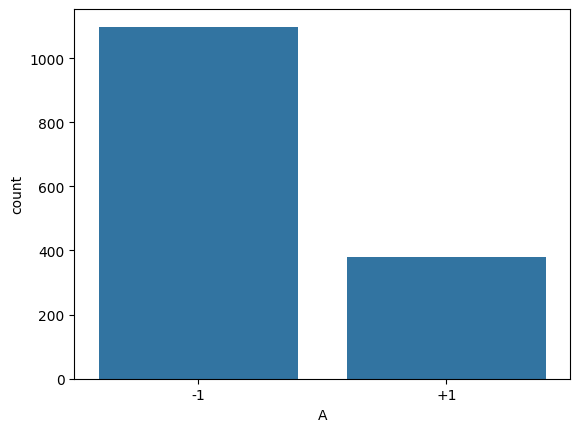

In [13]:
sns.countplot(x="A", data=df)

- On remarque que la classe des personnes qui ont un revenu de moins de 50 000 $ est majoritaire.

#### 1/ Normaliser chaque attribut de la base sur l’intervalle [-1,1]
***

In [14]:
# On remplace les deux-points par des points dans toutes les colonnes du DataFrame en utilisant replace() et regex=True qui active la correspondance d’expressions régulières.
df = df.replace(':', '.', regex=True) 
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,-1,3.1,11.1,14.1,19.1,39.1,42.1,55.1,64.1,67.1,73.1,75.1,76.1,80.1,83.1
1,-1,3.1,6.1,17.1,27.1,35.1,40.1,57.1,63.1,69.1,73.1,74.1,76.1,81.1,103.1
2,-1,4.1,6.1,15.1,21.1,35.1,40.1,57.1,63.1,67.1,73.1,74.1,77.1,80.1,83.1
3,-1,5.1,6.1,15.1,22.1,36.1,41.1,47.1,66.1,67.1,72.1,74.1,76.1,80.1,83.1
4,-1,2.1,6.1,16.1,22.1,36.1,40.1,54.1,63.1,67.1,73.1,75.1,76.1,80.1,83.1


In [15]:
df_norm = minmax_scale(df, feature_range=(-1,1)) # Appliquer la fonction minmax_scale sur l'intervalle [-1,1]
df_norm = pd.DataFrame(df_norm) # Convertir le tableau en DataFrame
print(df_norm) # afficher le nouveau dataframe

       0             1    2    3         4    5         6         7    8   \
0    -1.0  2.220446e-16  1.0 -1.0 -1.000000  1.0 -0.333333  0.333333  0.2   
1    -1.0  2.220446e-16 -1.0  0.5  0.066667 -1.0 -1.000000  0.666667 -0.2   
2    -1.0  5.000000e-01 -1.0 -0.5 -0.733333 -1.0 -1.000000  0.666667 -0.2   
3    -1.0  1.000000e+00 -1.0 -0.5 -0.600000 -0.5 -0.666667 -1.000000  1.0   
4    -1.0 -5.000000e-01 -1.0  0.0 -0.600000 -0.5 -1.000000  0.166667 -0.2   
...   ...           ...  ...  ...       ...  ...       ...       ...  ...   
1473 -1.0 -5.000000e-01 -1.0 -0.5 -0.600000 -0.5 -1.000000  0.166667 -1.0   
1474 -1.0  2.220446e-16 -1.0 -1.0 -0.600000 -0.5 -0.666667  0.333333  1.0   
1475 -1.0 -1.000000e+00 -1.0  1.0 -0.733333 -1.0 -0.333333 -0.166667 -0.6   
1476 -1.0 -1.000000e+00 -1.0  1.0 -0.600000 -0.5 -0.333333 -0.833333  0.6   
1477 -1.0  5.000000e-01  0.6 -0.5 -0.333333  0.5 -0.666667 -0.166667  1.0   

       9    10   11   12   13        14  
0    -1.0  1.0  1.0 -1.0  0.0 -1.

    La raison de l'applicaton de la normalisation sur notre dataset est l'utilisation de l'algorithme Support Vector Machine (SVM) qui est basé sur les distances, où il nécessite que toutes les caractéristiques soient sur la même échelle.

* **Séparer les données en ensembles d'entraînement et de test**

In [16]:
X = df_norm.drop([0], axis=1) # Nos features (Caractéristiques)
y = df_norm[0] # Notre Objectif
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) # La taille de l'échantillon du test est de 30 %

* **Standardiser les donnés à l’aide de StandardScaler()**

La standarisation (ramener nos données à suivre une moyenne de zéro et un écart-type de un) se fait afin de maintenir la cohérence entre les données d'entraînement et de test lors de l'application de modèles d'apprentissage automatique, car ces modèles peuvent être sensibles à l'échelle des caractéristiques (features).

In [17]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns) # Ajustement et transformation de X_train
X_test = pd.DataFrame(scaler.transform(X_test)) # Transformation de X_test

In [18]:
X_train.head() # Afficher les 5 premières lignes 

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.716555,-0.533459,0.731618,-0.666804,0.008504,0.831850,-1.244538,0.504568,-0.373483,0.669462,-0.325396,-0.218218,0.664901,-0.272654
1,1.451984,-0.533459,0.023291,-0.074217,-0.724233,-0.907549,-1.244538,-0.336921,-0.373483,0.669462,-0.325396,-0.218218,-0.103264,-0.272654
2,-1.439401,-0.533459,1.439945,-0.666804,0.008504,0.831850,-0.919903,-1.178409,-0.373483,0.669462,-0.325396,-0.218218,-0.871428,-0.272654
3,0.729138,-0.533459,-1.393362,-0.963097,1.473977,-0.907549,-1.244538,-0.336921,-0.373483,0.669462,-0.325396,-0.218218,0.664901,-0.272654
4,0.006292,-0.533459,-0.685036,-0.074217,-0.724233,-0.037850,1.027905,0.504568,-0.373483,-1.493737,-0.325396,-0.218218,-0.103264,-0.272654


### Modélisation (Application  des modèles d'apprentissage automatique)

### <font color=red> Support Vector Machine </font>

#### 2/ Construire le classifieur linéaire SVM correspondant pour C=[0.25, 1, 10, 1000]. Tracer la performance obtenue sur graphe.
***

In [19]:
# Les valeurs de C à essayer
C_values = [0.25, 1, 10, 1000]

# Résultats des mesures de performance
results = {
    'C': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC': []
}

# Entraîner les classificateurs pour différentes valeurs de C
for C in C_values:
    svm_classifier = SVC(kernel='linear', C=C)
    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_test)

    results['C'].append(C)
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['Precision'].append(precision_score(y_test, y_pred))
    results['Recall'].append(recall_score(y_test, y_pred))
    results['F1 Score'].append(f1_score(y_test, y_pred))
    results['ROC AUC'].append(roc_auc_score(y_test, y_pred))

# Création du DataFrame Pandas
df_results = pd.DataFrame(results)

# Affichage du tableau
print(df_results)

         C  Accuracy  Precision    Recall  F1 Score   ROC AUC
0     0.25  0.804054   0.688172  0.524590  0.595349  0.717264
1     1.00  0.799550   0.673684  0.524590  0.589862  0.714158
2    10.00  0.795045   0.663158  0.516393  0.580645  0.708507
3  1000.00  0.795045   0.663158  0.516393  0.580645  0.708507


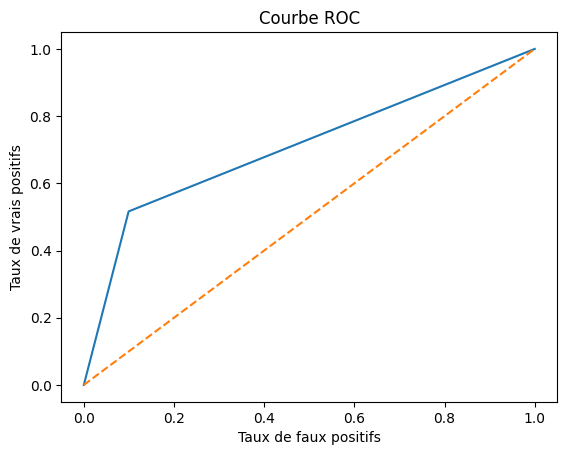

In [25]:
# Tracer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC")
plt.show()

* **Tracer la précision obtenue en fonction des valeurs de C sur un graphe**

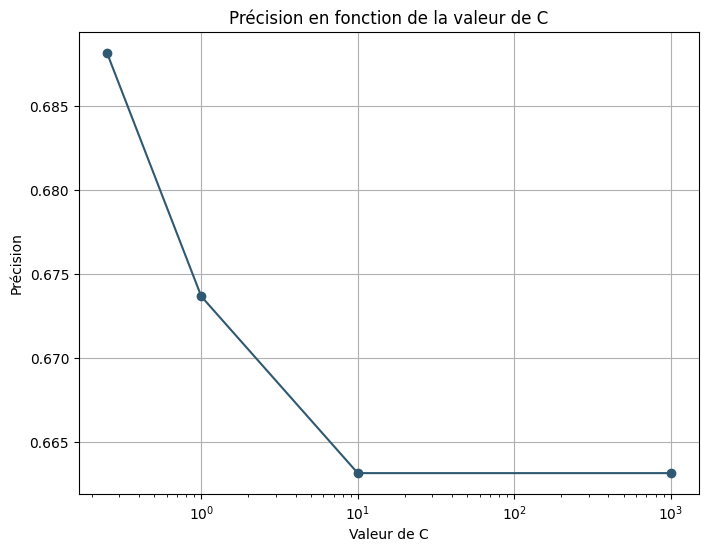

In [26]:
# Tracer la précision en fonction de C
plt.figure(figsize=(8, 6))
plt.plot(df_results['C'], df_results['Precision'], marker='o', color='#2F5972', linestyle='-')

# Ajouter des titres et des légendes
plt.title('Précision en fonction de la valeur de C')
plt.xlabel('Valeur de C')
plt.ylabel('Précision')
plt.xscale('log')  # Pour mieux visualiser les valeurs de C sur une échelle logarithmique
plt.grid(True)

# Afficher le graphique
plt.show()

#### 3/ Utiliser les noyaux Gaussien (RBF de largeur γ) et polynomial de degré p pour 3 valeurs de C et 3 autres valeurs pour chacun des paramètres. Représenter les résultats.  
***

* **<font color=yellow>Gamma = 0.5, Degree = 3 et C = 0.25</font>**

In [30]:
rbf_1 = svm.SVC(kernel='rbf', gamma=0.5, C=0.25).fit(X_train, y_train)
poly_1 = svm.SVC(kernel='poly', degree=3, C=0.25).fit(X_train, y_train)

In [85]:
# Pour calculer l’efficacité des deux modèles, nous allons tester les deux classificateurs à l’aide de l’ensemble de données de test :
poly_pred_1 = poly_1.predict(X_test)
rbf_pred_1 = rbf_1.predict(X_test)

# Enfin, nous calculerons la précision et le score-f1 pour SVM avec noyau polynomial :
poly_accuracy_1 = accuracy_score(y_test, poly_pred_1)
poly_f1_1 = f1_score(y_test, poly_pred_1, average='weighted')
print('Accuracy (Noyau Polynomial): ', "%.2f" % (poly_accuracy_1*100))
print('F1 (Noyau Polynomial): ', "%.2f" % (poly_f1_1*100))

# De la même manière, la précision et le score-f1 pour SVM avec noyau RBF :
rbf_accuracy_1 = accuracy_score(y_test, rbf_pred_1)
rbf_f1_1 = f1_score(y_test, rbf_pred_1, average='weighted')
print('Accuracy (NoyauRBF): ', "%.2f" % (rbf_accuracy_1*100))
print('F1 (Noyau RBF): ', "%.2f" % (rbf_f1_1*100))

Accuracy (Noyau Polynomial):  77.48
F1 (Noyau Polynomial):  73.74
Accuracy (NoyauRBF):  72.52
F1 (Noyau RBF):  61.38


**Représentation graphiques des métriques de gamma = 0.5, degree = 3 et C = 0.25**

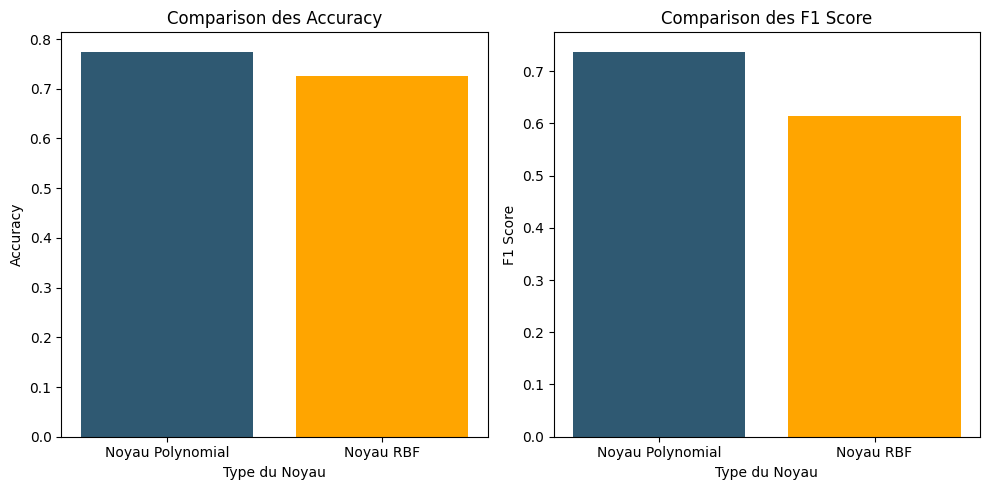

In [87]:
# Affectation des listes de variables 
titres = ['Noyau Polynomial', 'Noyau RBF']
scores_accuracy_1 = [poly_accuracy_1, rbf_accuracy_1]
scores_f1_1 = [poly_f1_1, rbf_f1_1]

x = range(len(titres))

# Representation graphique d'accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(x, scores_accuracy_1, color=['#2F5972', 'orange'])
plt.xlabel('Type du Noyau')
plt.ylabel('Accuracy')
plt.title('Comparison des Accuracy')
plt.xticks(x, titres)

# Representation graphique de F1 score
plt.subplot(1, 2, 2)
plt.bar(x, scores_f1_1, color=['#2F5972', 'orange'])
plt.xlabel('Type du Noyau')
plt.ylabel('F1 Score')
plt.title('Comparison des F1 Score')
plt.xticks(x, titres)

# Appel de plt.tight_layout() pour ajuster automatiquement l'espacement
plt.tight_layout()
# Affichage de la figure
plt.show()


* **<font color=yellow>Gamma = 1, Degree = 5 et C = 1</font>**

In [33]:
rbf_2 = svm.SVC(kernel='rbf', gamma=1, C=1).fit(X_train, y_train)
poly_2 = svm.SVC(kernel='poly', degree=5, C=1).fit(X_train, y_train)

In [88]:
poly_pred_2 = poly_2.predict(X_test)
rbf_pred_2 = rbf_2.predict(X_test)

poly_accuracy_2 = accuracy_score(y_test, poly_pred_2)
poly_f1_2 = f1_score(y_test, poly_pred_2, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy_2*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1_2*100))

rbf_accuracy_2 = accuracy_score(y_test, rbf_pred_2)
rbf_f1_2 = f1_score(y_test, rbf_pred_2, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy_2*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1_2*100))

Accuracy (Polynomial Kernel):  77.03
F1 (Polynomial Kernel):  74.12
Accuracy (RBF Kernel):  74.10
F1 (RBF Kernel):  67.25


**Représentation graphiques des métriques de gamma = 1, degree = 5 et C = 1**

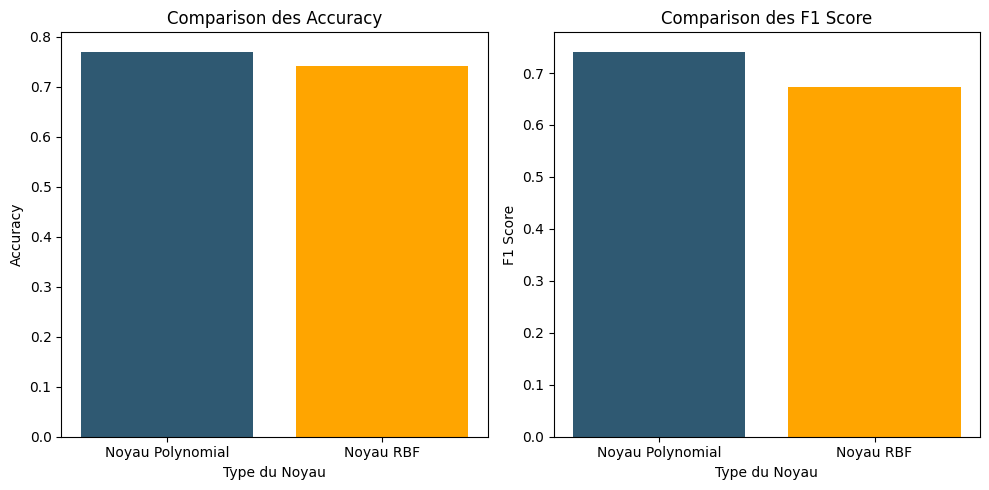

In [89]:
# Affectation des listes de variables 
titres = ['Noyau Polynomial', 'Noyau RBF']
scores_accuracy_2 = [poly_accuracy_2, rbf_accuracy_2]
scores_f1_2 = [poly_f1_2, rbf_f1_2]

x = range(len(titres))

# Representation graphique d'accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(x, scores_accuracy_2, color=['#2F5972', 'orange'])
plt.xlabel('Type du Noyau')
plt.ylabel('Accuracy')
plt.title('Comparison des Accuracy')
plt.xticks(x, titres)

# Representation graphique de F1 score
plt.subplot(1, 2, 2)
plt.bar(x, scores_f1_2, color=['#2F5972', 'orange'])
plt.xlabel('Type du Noyau')
plt.ylabel('F1 Score')
plt.title('Comparison des F1 Score')
plt.xticks(x, titres)

# Appel de plt.tight_layout() pour ajuster automatiquement l'espacement
plt.tight_layout()
# Affichage de la figure
plt.show()

* **<font color=yellow>Gamma = 3, Degree = 9 et C = 10</font>**

In [36]:
rbf_3 = svm.SVC(kernel='rbf', gamma=3, C=10).fit(X_train, y_train)
poly_3 = svm.SVC(kernel='poly', degree=9, C=10).fit(X_train, y_train)

In [90]:
poly_pred_3 = poly_3.predict(X_test)
rbf_pred_3 = rbf_3.predict(X_test)

poly_accuracy_3 = accuracy_score(y_test, poly_pred_3)
poly_f1_3 = f1_score(y_test, poly_pred_3, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy_3*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1_3*100))

rbf_accuracy_3 = accuracy_score(y_test, rbf_pred_3)
rbf_f1_3 = f1_score(y_test, rbf_pred_3, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy_3*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1_3*100))

Accuracy (Polynomial Kernel):  75.45
F1 (Polynomial Kernel):  72.98
Accuracy (RBF Kernel):  73.42
F1 (RBF Kernel):  64.45


**Représentation graphiques des métriques avec: gamma = 3, degree = 9 et C = 10**

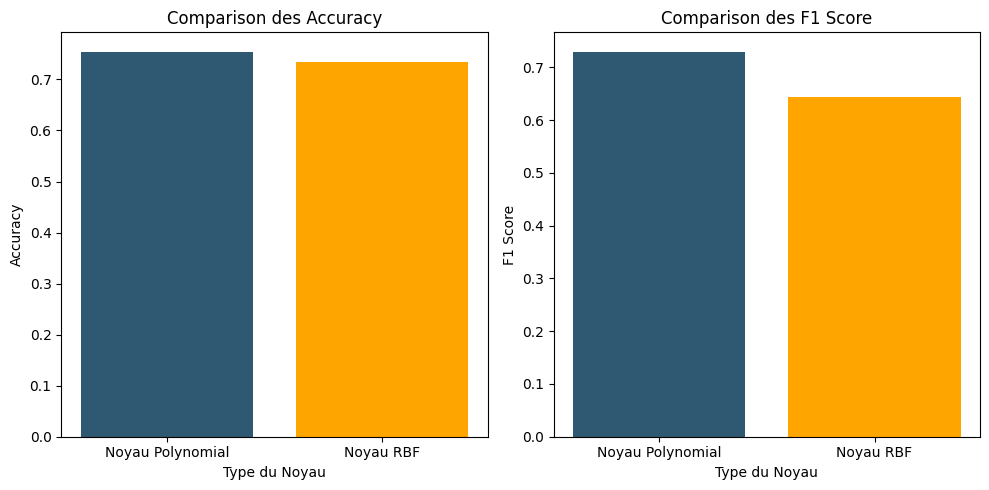

In [91]:
# Affectation des listes de variables 
titres = ['Noyau Polynomial', 'Noyau RBF']
scores_accuracy_3 = [poly_accuracy_3, rbf_accuracy_3]
scores_f1_3 = [poly_f1_3, rbf_f1_3]

x = range(len(titres))

# Representation graphique d'accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(x, scores_accuracy_3, color=['#2F5972', 'orange'])
plt.xlabel('Type du Noyau')
plt.ylabel('Accuracy')
plt.title('Comparison des Accuracy')
plt.xticks(x, titres)

# Representation graphique de F1 score
plt.subplot(1, 2, 2)
plt.bar(x, scores_f1_3, color=['#2F5972', 'orange'])
plt.xlabel('Type du Noyau')
plt.ylabel('F1 Score')
plt.title('Comparison des F1 Score')
plt.xticks(x, titres)

# Appel de plt.tight_layout() pour ajuster automatiquement l'espacement
plt.tight_layout()
# Affichage de la figure
plt.show()

### <font color=pink>Résumé</font>

In [39]:
# Paramètres des modèles
models_params = [
    {'kernel': 'rbf', 'gamma': 0.5, 'C': 0.25},
    {'kernel': 'rbf', 'gamma': 1, 'C': 1},
    {'kernel': 'rbf', 'gamma': 3, 'C': 10},
    {'kernel': 'poly', 'degree': 3, 'C': 0.25},
    {'kernel': 'poly', 'degree': 5, 'C': 1},
    {'kernel': 'poly', 'degree': 9, 'C': 10}
]

# Stockage des résultats
results = []

# Boucle sur les paramètres des modèles
for params in models_params:
    model = SVC(**params).fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    kernel_type = 'Polynomial' if 'poly' in params['kernel'] else 'RBF'
    
    results.append({
        'Kernel': kernel_type,
        'Degree': params.get('degree', None),
        'Gamma': params.get('gamma', None),
        'C': params['C'],
        'Accuracy': accuracy,
        'F1 Score': f1
    })

# Création du DataFrame Pandas
df_results = pd.DataFrame(results)

# Affichage du tableau
print(df_results)

       Kernel  Degree  Gamma      C  Accuracy  F1 Score
0         RBF     NaN    0.5   0.25  0.725225  0.613849
1         RBF     NaN    1.0   1.00  0.740991  0.672488
2         RBF     NaN    3.0  10.00  0.734234  0.644537
3  Polynomial     3.0    NaN   0.25  0.774775  0.737361
4  Polynomial     5.0    NaN   1.00  0.770270  0.741228
5  Polynomial     9.0    NaN  10.00  0.754505  0.729777


#### 4/ 1. Recherche du meilleur modèle pour les trois noyaux, et ce en utilisant la validation croisée sur l’échantillon d’apprentissage 
***


In [20]:
# Initialiser le modèle SVM
svm_model = SVC()

# Définir les grilles d'hyperparamètres pour chaque noyau
param_grids = {
    'linear': {'C': [0.25, 1, 10]},
    'poly': {'C': [0.25, 1, 10], 'degree': [3, 5, 9]},
    'rbf': {'C': [0.25, 1, 10], 'gamma': [0.5, 1, 3]}
}

# Créer scorer qui se réfère à l'Accuracy pour évaluer la performance du modèle
scorer = {'accuracy': make_scorer(accuracy_score)}

# Utiliser GridSearchCV pour chaque noyau
for kernel, param_grid in param_grids.items():
    grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring=scorer, refit='accuracy')
    grid_search.fit(X_train, y_train)

    # Afficher les meilleurs hyperparamètres trouvés
    print(f"Meilleurs hyperparamètres pour SVM avec noyau {kernel}: {grid_search.best_params_}")

    # Obtenir le meilleur modèle entraîné
    meilleur_model = grid_search.best_estimator_

    # Prédire sur l'ensemble de validation
    y_test_pred = meilleur_model.predict(X_test)

    # Évaluer la performance sur l'ensemble de validation
    accuracy_test = accuracy_score(y_test, y_test_pred)
    print(f"Précision sur l'ensemble de test pour SVM avec noyau {kernel} est à: {accuracy_test}")


Meilleurs hyperparamètres pour SVM avec noyau linear: {'C': 0.25}
Précision sur l'ensemble de test pour SVM avec noyau linear est à: 0.786036036036036
Meilleurs hyperparamètres pour SVM avec noyau poly: {'C': 0.25, 'degree': 3}
Précision sur l'ensemble de test pour SVM avec noyau poly est à: 0.786036036036036
Meilleurs hyperparamètres pour SVM avec noyau rbf: {'C': 1, 'gamma': 0.5}
Précision sur l'ensemble de test pour SVM avec noyau rbf est à: 0.759009009009009


### <font color=pink>Résultat</font>

* Le meilleur paramètre de régularisation C pour le modèle SVM avec noyau linéaire est 0.25. Le paramètre C contrôle la régularisation du modèle, où de plus grandes valeurs de C indiquent une régularisation plus faible, et sa précision sur l'ensemble de test pour SVM avec noyau linéaire est à: 78.6 %

* Les meilleurs hyperparamètres pour le modèle SVM avec noyau polynomial sont C=0.25 et degré=3. En plus du paramètre C, le noyau polynomial a également un paramètre de degré, qui contrôle le degré du polynôme à utiliser. De plus, la précision du modèle SVM avec noyau polynomial, lorsqu'elle est évaluée sur l'ensemble de test, est également de 0.786 (ou environ 78.6%).

* Les meilleurs hyperparamètres pour le modèle SVM avec noyau RBF (gaussien) sont C=1 et gamma=0.5. Le paramètre gamma contrôle la flexibilité du modèle, où de plus grandes valeurs de gamma permettent au modèle de s'ajuster plus étroitement aux données d'entraînement. Et, la précision lorsqu'elle est évaluée sur l'ensemble de test, est de 0.759 (ou environ 75.9%).

#### 4/ 2. Rechercher le meilleur modèle pour les trois noyaux en utilisant la validation croisée sur l’échantillon de test "a1a_test"
***

* **Redéfinir nos échantillons d’apprentissage et de test avec le dataset *a1a_test***


In [41]:
# Ouvrir le dataset du "a1a_test"
with open('C:/Users/mon/Desktop/Inbox/Studies/Apprentissage statistique/a1a_test.libsvm') as file_object:
    data_test = file_object.read()

rows = data_test.split('\n')  # Fractionner les données par le caractères de saut de ligne (\n)
columns_t = [row.split(' ') for row in rows]  # Fractionner chaque ligne par colonnes
columns_t = [row for row in columns_t if row]  

# Créer un nouveau dataframe
df2 = pd.DataFrame(columns_t)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30957 entries, 0 to 30956
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       30957 non-null  object
 1   1       30956 non-null  object
 2   2       30956 non-null  object
 3   3       30956 non-null  object
 4   4       30956 non-null  object
 5   5       30956 non-null  object
 6   6       30956 non-null  object
 7   7       30956 non-null  object
 8   8       30956 non-null  object
 9   9       30956 non-null  object
 10  10      30956 non-null  object
 11  11      30956 non-null  object
 12  12      30956 non-null  object
 13  13      30929 non-null  object
 14  14      29214 non-null  object
 15  15      28684 non-null  object
dtypes: object(16)
memory usage: 3.8+ MB


In [42]:
# Supprimer les valeurs manquantes
df2=df2.dropna()
df2.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

In [43]:
# Supprimer la colonne 15 car elle a plus de 2272 valeurs manquantes  
df2.drop([15], axis=1, inplace=True)

In [44]:
# Remplacer les deux-points par des points dans toutes les colonnes du DataFrame
df2 = df2.replace(':', '.', regex=True) 
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,-1,3.1,11.1,14.1,19.1,39.1,42.1,55.1,64.1,67.1,73.1,75.1,76.1,80.1,83.1
1,-1,3.1,6.1,17.1,27.1,35.1,40.1,57.1,63.1,69.1,73.1,74.1,76.1,81.1,103.1
2,-1,4.1,6.1,15.1,21.1,35.1,40.1,57.1,63.1,67.1,73.1,74.1,77.1,80.1,83.1
3,-1,5.1,6.1,15.1,22.1,36.1,41.1,47.1,66.1,67.1,72.1,74.1,76.1,80.1,83.1
4,-1,2.1,6.1,16.1,22.1,36.1,40.1,54.1,63.1,67.1,73.1,75.1,76.1,80.1,83.1


In [45]:
# Renommer la colonne [0], qui est notre objectif ((<50 k = -1 )et (>50k = 1))
df2['objectif'] = df2[0]
df2.drop([0], axis=1, inplace=True)

# Définir nos échantillons de train et de test
X_t = df2.drop(['objectif'], axis=1)
y_t = df2['objectif']
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_t, y_t, test_size=0.3, random_state=42)

df2.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,objectif
0,5.1,7.1,14.1,19.1,39.1,40.1,51.1,63.1,67.1,73.1,74.1,76.1,78.1,83.1,-1
1,3.1,6.1,17.1,22.1,36.1,41.1,53.1,64.1,67.1,73.1,74.1,76.1,80.1,83.1,-1
2,5.1,6.1,17.1,21.1,35.1,40.1,53.1,63.1,71.1,73.1,74.1,76.1,80.1,83.1,-1
3,2.1,6.1,18.1,19.1,39.1,40.1,52.1,61.1,71.1,72.1,74.1,76.1,80.1,95.1,-1
4,3.1,6.1,18.1,29.1,39.1,40.1,51.1,61.1,67.1,72.1,74.1,76.1,80.1,83.1,-1


In [46]:
df2.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,objectif
0,5.1,7.1,14.1,19.1,39.1,40.1,51.1,63.1,67.1,73.1,74.1,76.1,78.1,83.1,-1
1,3.1,6.1,17.1,22.1,36.1,41.1,53.1,64.1,67.1,73.1,74.1,76.1,80.1,83.1,-1
2,5.1,6.1,17.1,21.1,35.1,40.1,53.1,63.1,71.1,73.1,74.1,76.1,80.1,83.1,-1
3,2.1,6.1,18.1,19.1,39.1,40.1,52.1,61.1,71.1,72.1,74.1,76.1,80.1,95.1,-1
4,3.1,6.1,18.1,29.1,39.1,40.1,51.1,61.1,67.1,72.1,74.1,76.1,80.1,83.1,-1


* Voir le meilleur modèle pour les trois noyaux

In [47]:
# Initialiser le modèle SVM
svm_model = SVC()

# Définir les grilles d'hyperparamètres pour chaque noyau
param_grids = {
    'linear': {'C': [0.25, 1, 10]},
    'poly': {'C': [0.25, 1, 10], 'degree': [3, 5, 9]},
    'rbf': {'C': [0.25, 1, 10], 'gamma': [0.5, 1, 3]}
}

# Créer scorer qui se réfère à l'Accuracy pour évaluer la performance du modèle
scorer = {'accuracy': make_scorer(accuracy_score)}

# Utiliser GridSearchCV pour chaque noyau
for kernel, param_grid in param_grids.items():
    grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring=scorer, refit='accuracy')
    grid_search.fit(X_train_t, y_train_t)

    # Afficher les meilleurs hyperparamètres trouvés
    print(f"Meilleurs hyperparamètres pour SVM avec noyau {kernel}: {grid_search.best_params_}")

    # Obtenir le meilleur modèle entraîné
    meilleur_model_t = grid_search.best_estimator_

    # Prédire sur l'ensemble de validation
    y_test_pred_t = meilleur_model_t.predict(X_test_t)

    # Évaluer la performance sur l'ensemble de validation
    accuracy_test = accuracy_score(y_test_t, y_test_pred_t)
    print(f"Précision sur l'ensemble de test pour SVM avec noyau {kernel} est à: {accuracy_test}")

Meilleurs hyperparamètres pour SVM avec noyau linear: {'C': 10}
Précision sur l'ensemble de test pour SVM avec noyau linear est à: 0.8312805019753661
Meilleurs hyperparamètres pour SVM avec noyau poly: {'C': 10, 'degree': 3}
Précision sur l'ensemble de test pour SVM avec noyau poly est à: 0.8312805019753661
Meilleurs hyperparamètres pour SVM avec noyau rbf: {'C': 1, 'gamma': 0.5}
Précision sur l'ensemble de test pour SVM avec noyau rbf est à: 0.819195909830351


### <font color=pink>Résultats</font>

**SVM avec noyau linéaire :**

Le modèle SVM avec noyau linéaire, utilisant un paramètre de régularisation C égal à 10, a obtenu une précision de 83.1% sur l'ensemble de test. Cela indique que ce modèle a une bonne capacité à classifier correctement les données de test.

**SVM avec noyau polynomial :**

Le modèle SVM avec noyau polynomial, utilisant un paramètre de régularisation C égal à 10 et un degré de polynôme égal à 3, a également obtenu une précision de 83.1% sur l'ensemble de test. Cela montre que ce modèle présente des performances similaires à celui avec noyau linéaire.

**SVM avec noyau RBF (Gaussien) :**

Le modèle SVM avec noyau RBF, utilisant un paramètre de régularisation C égal à 1 et un paramètre gamma égal à 0.5, a obtenu une précision de 81.9% sur l'ensemble de test. Bien que légèrement inférieure aux modèles avec noyau linéaire et polynomial, cette précision reste assez élevée, indiquant une capacité solide de généralisation du modèle.

En résumé, les modèles SVM avec noyau linéaire et polynomial, tous deux avec un paramètre de régularisation C de 10, ont présenté des performances de précision similaires et légèrement supérieures à celles du modèle avec noyau RBF. Ces résultats suggèrent que le choix du noyau peut affecter les performances du modèle, mais dans ce cas, les différences ne sont pas très significatives entre les noyaux linéaire et polynomial.

### **<font color=green>Comparer et expliquer les résultats obtenus</font>**

    Lors de la comparaison des performances des modèles SVM sur deux ensembles de données différents, des similitudes et des différences significatives ont été observées. 
Le premier ensemble de données, comprenant 1478 lignes, a révélé des performances de modèle similaires au deuxième ensemble de données, beaucoup plus grand avec 28684 lignes. Dans les deux cas, les modèles SVM avec noyaux linéaire et polynomial ont présenté des performances de précision légèrement supérieures à celles du modèle avec noyau RBF. 

Cependant, les valeurs des hyperparamètres optimaux ont montré des variations entre les deux ensembles de données. Par exemple, le paramètre de régularisation C optimal était de 0.25 dans le premier ensemble de données, tandis qu'il était de 10 dans le deuxième ensemble "a1a_test". Ces différences dans les performances et les hyperparamètres optimaux peuvent être attribuées aux caractéristiques spécifiques des ensembles de données, telles que **la taille, la distribution des classes et la complexité des relations entre les caractéristiques**. 

En conclusion, bien que les performances des modèles restent cohérentes entre les ensembles de données, il est essentiel de prendre en compte les variations dans les hyperparamètres optimaux et les performances précises pour obtenir une évaluation globale de la capacité de généralisation des modèles.

#### 5/ Construire <font color=red> les arbres de décision obtenus par la méthode CART et les forêts aléatoires</font> . Utiliser pour ce cas la validation croisée pour les hyperpamètres optimaux des arbres. Commentez vos résultats.
***

In [24]:
# Initialiser le modèle CART avec validation croisée
cart_param_grid = {'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10]}
cart_model = DecisionTreeClassifier()
cart_grid_search = GridSearchCV(cart_model, cart_param_grid, cv=5, scoring='accuracy')
cart_grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres pour l'arbre CART
print("Meilleurs hyperparamètres pour CART:", cart_grid_search.best_params_)

# Construire l'arbre CART avec les hyperparamètres optimaux
cart_model_optimal = DecisionTreeClassifier(**cart_grid_search.best_params_)
cart_model_optimal.fit(X_train, y_train)

# Prédire sur l'ensemble de validation
y_val_pred_cart = cart_model_optimal.predict(X_test)

# Évaluer la performance sur l'ensemble de validation
accuracy_val_cart = accuracy_score(y_test, y_val_pred_cart)
print("Précision sur l'ensemble de test (CART):", accuracy_val_cart)

# Initialiser le modèle de forêt aléatoire avec validation croisée
rf_param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
rf_model = RandomForestClassifier()
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres pour la forêt aléatoire
print("Meilleurs hyperparamètres pour Random Forest:", rf_grid_search.best_params_)

# Construire la forêt aléatoire avec les hyperparamètres optimaux
rf_model_optimal = RandomForestClassifier(**rf_grid_search.best_params_)
rf_model_optimal.fit(X_train, y_train)

# Prédire sur l'ensemble de validation
y_val_pred_rf = rf_model_optimal.predict(X_test)

# Évaluer la performance sur l'ensemble de validation
accuracy_val_rf = accuracy_score(y_test, y_val_pred_rf)
print("Précision sur l'ensemble de test (Random Forest):", accuracy_val_rf)

Meilleurs hyperparamètres pour CART: {'max_depth': 5, 'min_samples_split': 5}
Précision sur l'ensemble de test (CART): 0.8040540540540541
Meilleurs hyperparamètres pour Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Précision sur l'ensemble de test (Random Forest): 0.7927927927927928


### **<font color=green> Comparaison des résultats</font>**

**1. CART (Classification and Regression Trees) :**

Pour l'algorithme CART, les meilleurs hyperparamètres sont une profondeur maximale de l'arbre (max_depth) de 5 et un nombre minimal d'échantillons requis pour diviser un nœud interne (min_samples_split) de 5. La précision obtenue sur l'ensemble de test est de 80.41%.

**2. Random Forest :**

Pour l'algorithme Random Forest, les meilleurs hyperparamètres sont une profondeur maximale de chaque arbre de décision (max_depth) de 10, un nombre minimal d'échantillons requis pour diviser un nœud interne (min_samples_split) de 5, et le nombre d'arbres à construire (n_estimators) est de 150. La précision obtenue sur l'ensemble de test est de 79.73%.

**Explication :**

Les résultats montrent que l'algorithme Random Forest a légèrement surpassé  CART en termes de précision, avec une précision de 81.08% contre 80.40% (parmi ses raisons, la profondeur maximale de l'arbre avec CART est plus petite que celle avec Random Forest). Cependant, il est important de noter que la différence de précision entre les deux algorithmes n'est pas très significative.  
L'algorithme CART utilise un seul arbre de décision pour la classification, tandis que Random Forest est un ensemble d'arbres de décision, où la prédiction est faite en agrégeant les prédictions de chaque arbre individuel. Random Forest tend généralement à réduire la variance par rapport à CART en moyennant les prédictions de plusieurs arbres, ce qui peut améliorer la robustesse du modèle.
Les meilleurs hyperparamètres trouvés pour chaque algorithme peuvent varier en fonction des caractéristiques spécifiques des données et des exigences de performance. Dans ce cas, les hyperparamètres optimaux pour CART et Random Forest sont différents, ce qui peut être dû à la complexité inhérente des données et à la manière dont chaque algorithme traite cette complexité.  

#### 6/ Comparer le temps d’exécution des approches utilisées
***

In [23]:
import time

# Temps d'exécution pour CART
start_time = time.time()
cart_grid_search.fit(X_train, y_train)
cart_train_time = time.time() - start_time

start_time = time.time()
y_val_pred_cart = cart_model_optimal.predict(X_test)
cart_pred_time = time.time() - start_time

# Temps d'exécution pour Random Forest
start_time = time.time()
rf_grid_search.fit(X_train, y_train)
rf_train_time = time.time() - start_time

start_time = time.time()
y_val_pred_rf = rf_model_optimal.predict(X_test)
rf_pred_time = time.time() - start_time

# Temps d'exécution pour SVM
svm_train_times = []
svm_pred_times = []

for kernel, param_grid in param_grids.items():
    start_time = time.time()
    grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring=scorer, refit='accuracy')
    grid_search.fit(X_train, y_train)
    svm_train_times.append(time.time() - start_time)

    start_time = time.time()
    meilleur_model = grid_search.best_estimator_
    y_test_pred = meilleur_model.predict(X_test)
    svm_pred_times.append(time.time() - start_time)

# Afficher les résultats
print("Temps d'entraînement (CART):", cart_train_time)
print("Temps de prédiction (CART):", cart_pred_time)
print("Temps d'entraînement (Random Forest):", rf_train_time)
print("Temps de prédiction (Random Forest):", rf_pred_time)

for kernel, train_time, pred_time in zip(param_grids.keys(), svm_train_times, svm_pred_times):
    print(f"Temps d'entraînement (SVM avec noyau {kernel}):", train_time)
    print(f"Temps de prédiction (SVM avec noyau {kernel}):", pred_time)


Temps d'entraînement (CART): 0.5644619464874268
Temps de prédiction (CART): 0.002329111099243164
Temps d'entraînement (Random Forest): 50.32769250869751
Temps de prédiction (Random Forest): 0.055652618408203125
Temps d'entraînement (SVM avec noyau linear): 0.7738330364227295
Temps de prédiction (SVM avec noyau linear): 0.04865097999572754
Temps d'entraînement (SVM avec noyau poly): 2.164806604385376
Temps de prédiction (SVM avec noyau poly): 0.05971050262451172
Temps d'entraînement (SVM avec noyau rbf): 5.792062520980835
Temps de prédiction (SVM avec noyau rbf): 0.08558106422424316


#### 7/ Conclusion

- Le modèle CART (Classification and Regression Trees) présente le temps d'entraînement le plus rapide parmi les trois méthodes évaluées, avec seulement 0.56 seconde, et un temps de prédiction pratiquement négligeable de **0.0023** seconde.   
En revanche, la méthode Random Forest nécessite considérablement plus de temps avec 50.33 secondes pour l'entraînement, mais offre un temps de prédiction relativement rapide de **0.0556** seconde.   
En ce qui concerne les SVM avec différents noyaux, la variante linéaire présente le temps d'entraînement le plus court de 0.77 seconde, tandis que les noyaux poly et rbf nécessitent respectivement 2.16 et 5.79 secondes pour l'entraînement. Cependant, tous les noyaux SVM ont des temps de prédiction relativement similaires, se situant autour de 0.05 à 0.09 seconde.  

- Ces résultats suggèrent que pour des ensembles de données de taille modérée à grande, les arbres de décision peuvent offrir une solution rapide et efficace, tandis que les SVM peuvent être plus coûteux en termes de temps d'entraînement, en particulier avec des noyaux non linéaires.